In [79]:
#Q] 1.4(8) Use Qiskit to display the probability of measuring a |0⟩ qubit in the states |+⟩ and |−⟩

In [80]:
from qiskit import QuantumCircuit, assemble, Aer, execute
from math import pi, sqrt
from qiskit.visualization import plot_bloch_multivector, plot_histogram
import numpy as np

qc = QuantumCircuit(1,1)
initial_state = [1/np.sqrt(2),1/np.sqrt(2)]
qc.initialize(initial_state, 0)
qc.measure(0,0)
backend = Aer.get_backend('qasm_simulator') #
counts = execute(qc,backend).result().get_counts()
plot_histogram(counts)
qc.draw()

┌─────────────────────────────┐┌─┐
q_0: ┤ initialize(0.70711,0.70711) ├┤M├
     └─────────────────────────────┘└╥┘
c: 1/════════════════════════════════╩═
                                     0

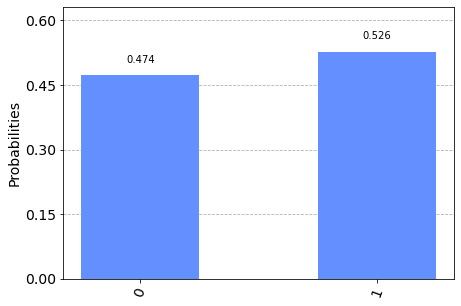

In [81]:
qasmsim = Aer.get_backend('qasm_simulator')
qobj = assemble(qc)
counts = qasmsim.run(qobj).result().get_counts()
plot_histogram(counts)

In [82]:
#Q 1.4(9) Try to create a function that measures in the Y-basis

# Ans. We want a gate that performs the transformation{1 in Y basis}
# 1/sqrt(2) [1-i] to [01]
# This can be achieved by a S^+ gates, followed by H gate.
# Next we measure it in the Z basis and then reverse the process by applying H gate and a sequence of S gate.

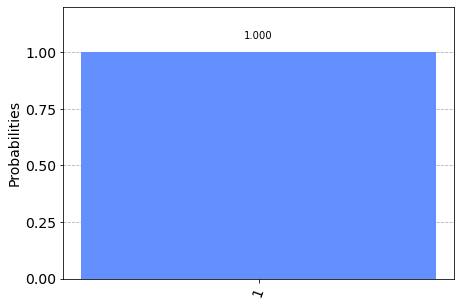

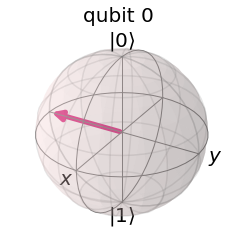

In [83]:
def y_measure(qc, qubit, cbit):
    qc.sdg(qubit)
    qc.h(qubit)
    qc.measure(qubit, cbit)
    qc.h(qubit)
    qc.s(qubit)
qc = QuantumCircuit(1,1)
initial_state = [1/math.sqrt(2), -1j/math.sqrt(2)]
qc.initialize(initial_state, 0)
y_measure(qc, 0,0)

backend = Aer.get_backend('statevector_simulator')
result = execute(qc,backend).result()
display(plot_histogram(result.get_counts()))
plot_bloch_multivector(result.get_statevector())